<a href="https://colab.research.google.com/github/drypuddle1220/Golf_Analytics/blob/main/Golf_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robikscube/pga-tour-golf-data-20152022")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/robikscube/pga-tour-golf-data-20152022/versions/1


In [ ]:

# prompt: take path and make it into a pd dataset

import pandas as pd
import os

# Assuming you have a CSV file in the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath)
            print(f"Successfully loaded {filename} into DataFrame")
            break  # Assuming you only want to load the first CSV file found
        except Exception as e:
            print(f"Error loading {filename}: {e}")
df
# Now you have the DataFrame 'df' with the data from the CSV file.

Successfully loaded ASA All PGA Raw Data - Tourn Level.csv into DataFrame


,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,V. Singh,2271,392,144,146,33.0,26.4,26,0,0.6,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36860,W. Kim,2271,7082,144,150,18.5,12.9,21,0,0.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36861,W. McGirt,2271,3532,216,215,44.5,40.6,45,0,6.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36862,Z. Blair,2271,9040,288,278,73.0,70.8,74,3,23.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Player_initial_last', 'tournament id', 'player id', 'hole_par',
       'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP',
       'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP',
       'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP',
       'player', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'tournament name',
       'course', 'date', 'purse', 'season', 'no_cut', 'Finish', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'],
      dtype='object')

In [ ]:
# Filter the dataframe for rows where made_cut == 1 and select the necessary columns
df_1 = df.loc[df.made_cut == 1, ['player', 'pos', 'sg_total', 'sg_putt', 'hole_FDP', 'streak_DKP', 'sg_t2g']]

# Group by 'player' and calculate the mean for 'pos', 'column1', and 'column2'
df_1



,player,pos,sg_total,sg_putt,hole_FDP,streak_DKP,sg_t2g
0,Abraham Ancer,32.0,0.85,0.20,51.1,3,0.65
1,Adam Hadwin,18.0,1.60,0.36,61.5,8,1.24
6,Aaron Rai,26.0,1.35,2.05,55.7,3,-0.70
7,Adam Schenk,26.0,1.35,-0.96,54.0,0,2.31
8,Adam Scott,67.0,-1.65,-0.82,34.7,0,-0.83
...,...,...,...,...,...,...,...
36855,Trevor Immelman,46.0,NaN,NaN,58.3,0,NaN
36857,Tyrone Van Aswegen,73.0,NaN,NaN,43.3,0,NaN
36858,Tim Wilkinson,65.0,NaN,NaN,48.3,0,NaN
36861,William McGirt,999.0,NaN,NaN,40.6,0,NaN


In [ ]:
from sklearn import linear_model


In [ ]:
import matplotlib.pyplot as plt

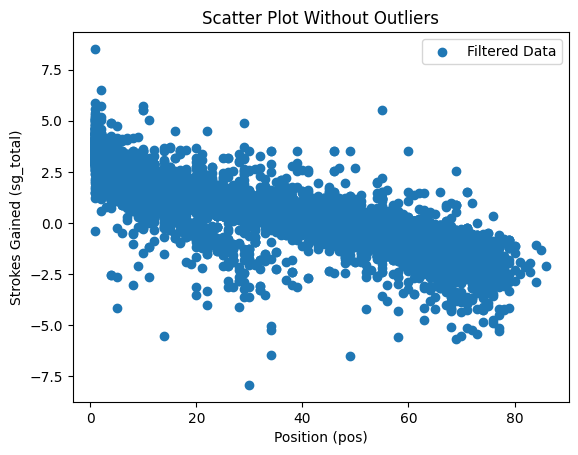

In [ ]:

# Define thresholds for filtering out outliers
pos_threshold = 300  # Adjust as needed for 'pos'
sg_total_threshold = 300  # Adjust as needed for 'sg_total'

# Filter out outliers based on thresholds
filtered_data = (df_1['pos'] < pos_threshold) & (df_1['sg_total'] < sg_total_threshold)
df_filtered = df_1[filtered_data]  # Keep only rows within the thresholds

# Scatter plot for filtered data
plt.scatter(df_filtered['pos'], df_filtered['sg_total'], label='Filtered Data')


# Add labels, title, and legend
plt.xlabel('Position (pos)')
plt.ylabel('Strokes Gained (sg_total)')
plt.title('Scatter Plot Without Outliers')
plt.legend()
plt.show()

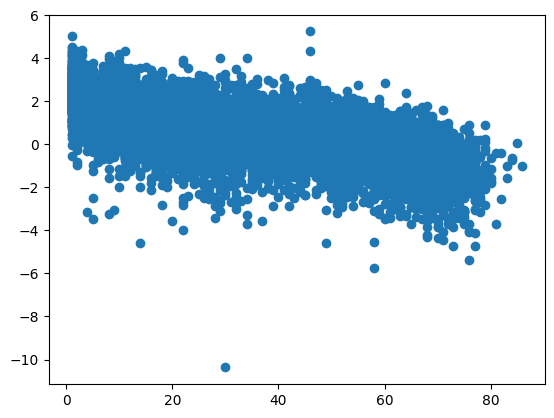

In [ ]:
filtered_data = (df_1['pos'] < pos_threshold) & (df_1['sg_t2g'] < sg_total_threshold)
df_filtered = df_1[filtered_data]  # Keep only rows within the thresholds
plt.scatter(df_filtered['pos'], df_filtered['sg_t2g'], label='Filtered Data')


Coefficients: [-9.39768976 -4.07365855 -3.81826065]
Intercept: 44.275963730460234
R-squared: 0.7462363869591226


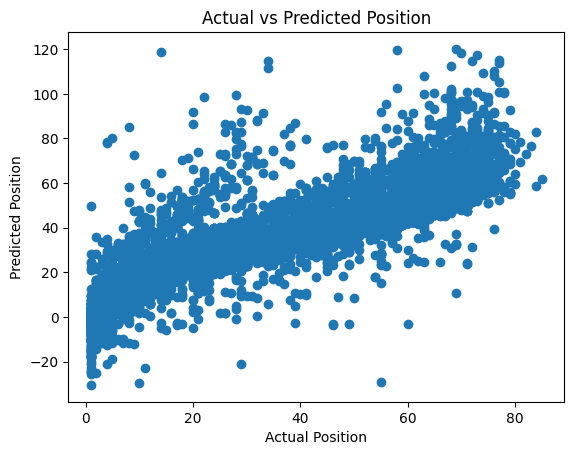

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

# Filter out outliers based on thresholds
filtered_data = (df_1['pos'] < pos_threshold) & (df_1['sg_total'] < sg_total_threshold) & (df_1['hole_FDP'] < 100 ) & (df_1['sg_t2g'] < 100)
df_filtered = df_1[filtered_data]  # Keep only rows within the thresholds

# Prepare the data for linear regression
X = df_filtered[['sg_total',  'sg_t2g', 'sg_putt']]  # Independent variables
y = df_filtered['pos']  # Dependent variable
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio adjusts between L1 and L2 penalties
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
predictions = model.predict(X)

# Evaluate the model (example: R-squared)
r_squared = model.score(X, y)
print("R-squared:", r_squared)

#Plot the results
plt.scatter(y, predictions)
plt.xlabel('Actual Position')
plt.ylabel('Predicted Position')
plt.title('Actual vs Predicted Position')
plt.show()



In [ ]:
#for the season, find the top ten preformers on average for avg top 20 position:
#next year's preformance metrics

#question: what is the specific prediction that will occur when given the player's last year metrics?




In [ ]:

filepath = '/content/dg_performance_2024.csv'  # Provide the correct file path here.

try:
    df_real_sg = pd.read_csv(filepath)
    print(f"Successfully loaded {filepath} into DataFrame")
except FileNotFoundError:
    print(f"Error: File not found at {filepath}. Please provide the correct path.")
    exit()  # Exit the script if the file is not found
except Exception as e:
    print(f"Error loading {filepath}: {e}")
    exit()

df_real_sg = df_real_sg[['player_name', 'total_true', 't2g_true', 'putt_true']]
df_real_sg

Successfully loaded /content/dg_performance_2024.csv into DataFrame


,player_name,total_true,t2g_true,putt_true
0,"Scheffler, Scottie",3.124852,3.064225,0.122485
1,"McIlroy, Rory",2.038324,1.713840,0.366535
2,"Burmester, Dean",0.935018,1.243312,0.097677
3,"McCarty, Matt",0.217546,0.091185,0.341045
4,"Jin, Zihao",0.098944,-9999.000000,-9999.000000
...,...,...,...,...
491,"Perico, Julian",-3.563178,-9999.000000,-9999.000000
492,"Gavins, Daniel",-3.783453,-4.265086,0.273963
493,"Sigel, Ben",-3.873857,-4.252880,-1.437795
494,"Chouhan, Om Prakash",-4.021047,-3.246443,-2.060528
